## 인공신경망

### 역전파


#### 다중계층 퍼셉트론 (Multi-Layer Perceptron)
- 단일 퍼셉트론 다중으로 겹쳐 해결가능한 문제 범주를 확대
- 복잡한 입력이 비선형 변경을 통해 분류가 쉬운 은닉 공간으로 매핑

    [참조](https://colah.github.io/posts/2015-09-NN-Types-FP/)

##### MLP 가중치 학습
- 학습으로 최적의 가중치(w) 및 편향(b)를 계산
- 레이어가 복잡할수록 가중치와 bias를 구하기 어려움
- **역전파(Backpropagation) 알고리즘**으로 MLP학습

##### 그래서 역전파란?
- 모델의 잘못된 결과를 예측했다면, 어떤 가중치가 가장 큰 영향을 미쳤는지를 추적한 뒤
- 이 가중치를 조금씩 조정하여 다음에 더 나은 결과를 만들게 하는 것

- 예를 들면, 시험을 보고 틀린 문제의 원인을 분석하는 과정!

##### PyTorch에서는 
- 텐서의 모든 연산에 대한 자동 미분을 제공하며
- 매 순간 적절한 역전파를 제공함

### 모델저장 및 로드

#### DNN(Deep Neural Network)
- 심층신경망 - 여러 비선형 변환의 조합을 통해 높은 수준의 추상화를 시도
    - 은닉계층으로 계속된 비선형 매핑, 목적에 맞는 특징 추출

#### 모델 저장과 로드
- 모델을 이용할 때마다 학습할 필요없음
- 모델 학습시 시간이 많이 소요되므로 매번 학습을 하는 것은 비효율적


#### 함수리스트
- torch.save() - 모델전체(계층 구조, 매개변수 등) 디스크에 저장
- torch.load() - 객체 역직렬화 후 메모리 할당
- state_dict() - 모델의 매개변수(가중치)만을 저장/로드할 때 이용

##### XOR 문제

|구분|input x1|input x2|output y|
|:---:|---:|---:|---:|
|a|0|0|0|
|b|1|0|1|
|c|0|1|1|
|d|1|1|0|


- 구조

    <img src="https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0013.png" width="600">

##### 위의 문제를 DNN으로

In [12]:
import torch
import torch.nn as nn

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [14]:
X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
Y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

In [15]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
).to(device)

In [16]:
# 비용함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device) # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [17]:
# 10_000번
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch:04d}, Cost: {cost.item():.9f}')
        torch.save(model, f'./models/mymodel_{epoch}.pt') ## epoch 100번마다 모델 저장


Epoch: 0000, Cost: 0.707413971
Epoch: 0100, Cost: 0.693155587
Epoch: 0200, Cost: 0.693154931
Epoch: 0300, Cost: 0.693154335
Epoch: 0400, Cost: 0.693153739
Epoch: 0500, Cost: 0.693153083
Epoch: 0600, Cost: 0.693152487
Epoch: 0700, Cost: 0.693151832
Epoch: 0800, Cost: 0.693151295
Epoch: 0900, Cost: 0.693150699
Epoch: 1000, Cost: 0.693150163
Epoch: 1100, Cost: 0.693149567
Epoch: 1200, Cost: 0.693148971
Epoch: 1300, Cost: 0.693148434
Epoch: 1400, Cost: 0.693147898
Epoch: 1500, Cost: 0.693147361
Epoch: 1600, Cost: 0.693146765
Epoch: 1700, Cost: 0.693146229
Epoch: 1800, Cost: 0.693145633
Epoch: 1900, Cost: 0.693145037
Epoch: 2000, Cost: 0.693144500
Epoch: 2100, Cost: 0.693143845
Epoch: 2200, Cost: 0.693143249
Epoch: 2300, Cost: 0.693142653
Epoch: 2400, Cost: 0.693142056
Epoch: 2500, Cost: 0.693141401
Epoch: 2600, Cost: 0.693140686
Epoch: 2700, Cost: 0.693139970
Epoch: 2800, Cost: 0.693139374
Epoch: 2900, Cost: 0.693138599
Epoch: 3000, Cost: 0.693137825
Epoch: 3100, Cost: 0.693136990
Epoch: 3

In [20]:
model = torch.load('./models/mymodel_1000.pt', map_location=device)
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print(f'모델의 출력값(Hypothesis): {hypothesis.detach().cpu().numpy()}')
    print(f'모델의 예측값(Predicted): {predicted.detach().cpu().numpy()}')
    print(f'실제값(Y): {Y.cpu().numpy()}')
    print(f'정확도(Accuracy): {accuracy.item()}')

모델의 출력값(Hypothesis): [[0.49993777]
 [0.49996787]
 [0.5000212 ]
 [0.5000572 ]]
모델의 예측값(Predicted): [[0.]
 [0.]
 [1.]
 [1.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy): 0.5


C:\Users\perso\AppData\Local\Temp\ipykernel_16120\186257832.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./models/mymodel_1000.pt', map_location=d

In [21]:
model = torch.load('./models/mymodel_10000.pt', map_location=device)
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print(f'모델의 출력값(Hypothesis): {hypothesis.detach().cpu().numpy()}')
    print(f'모델의 예측값(Predicted): {predicted.detach().cpu().numpy()}')
    print(f'실제값(Y): {Y.cpu().numpy()}')
    print(f'정확도(Accuracy): {accuracy.item()}')

모델의 출력값(Hypothesis): [[5.6829309e-04]
 [9.9954480e-01]
 [9.9946016e-01]
 [4.3980076e-04]]
모델의 예측값(Predicted): [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy): 1.0


C:\Users\perso\AppData\Local\Temp\ipykernel_16120\1915402402.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./models/mymodel_10000.pt', map_location

### 인공신경망

#### 드롭아웃(dropout)
- 과대적합 방지를 위한 방법 - 학습과정에 레이어 일부를 사용하지 않는 방법

#### ReLU(Rectified Linear Unit) - 정류한 선형 단위

- 시그모이드 함수보다 더 발전된 활성화 함수
- 간단하고 효과적이며, 특히 신경망 Hidden Layer에 주로 사용됨

<img src="https://raw.githubusercontent.com/hugoMGSung/study-pytorch/refs/heads/main/images/torch0014.png" width="600">

##### ReLU의 역할
- 비선형성 도입 - 신경망에서 비선형성을 제공, 단순한 선형회귀가 아닌 복잡합 패턴 학습가능케 함
- 간결한 계산 - 다른 활성화 함수(Sigmoid, Tanh)에 비해 수식이 간단, 역전파 계산시 효율적

##### 장점
- 기울기 소실(Vanishing Gradient) 문제 완화:
    - Sigmoid나 Tanh는 입력값이 커지거나 작아질수록 기울기가 0에 가까워져 학습이 느려지는 문제가 발생
    - 반면, ReLU는 양수 입력에 대해 기울기가 일정(1)하므로 학습이 더 빠르게 진행가능
- 효율성:
    - 함수가 단순하기 때문에 계산 비용이 적음
- 희소성(Sparsity):
    - ReLU는 음수 값을 0으로 만들어 네트워크의 일부 뉴런을 비활성화. 이로 인해 네트워크가 더 간결하게 학습할 수 있음

##### 단점
- 죽은 ReLU(Dying ReLU):
    - 학습 도중 일부 뉴런의 출력이 항상 0이 되어 더 이상 업데이트되지 않는 현상
    - 이를 해결하기 위해 Leaky ReLU, Parametric ReLU(PReLU) 같은 변형된 ReLU 함수가 사용
- 큰 입력값에서의 한계:
    - 너무 큰 값에서는 기울기가 일정하게 유지되므로 모델이 특정 상황에서 덜 민감할 수 있슴

#### 인공신경망 MNIST 데이터셋


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

from torchvision import datasets
import torchvision.transforms as transforms

import numpy as np

In [24]:
batch_size = 20
valid_size = 0.2

# MNIST dataset
train_data = datasets.MNIST(root='./MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root='./MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

## 이미 존재하므로 다시 다운로드 받지 않음

In [25]:
## Training set의 20%를 Validation set으로 이용
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [26]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)

##### 모델 생성

In [27]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),   # Sigmoid대신 ReLU로
    nn.Dropout(0.2), # 0.2를 Dropout 해서 과대적합 방지
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 10), # 최종적으로 0~9까지 분류
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

##### 훈련

In [28]:
n_epochs = 50
for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for idx, (data, target) in enumerate(train_loader):
        data = data.view(-1, 28 * 28)
        output = model(data)
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.size(0)

    model.eval()

    for idx, (data, target) in enumerate(valid_loader):
        data = data.view(-1, 28 * 28)
        output = model(data)
        loss = criterion(output, target)

        valid_loss += loss.item() * data.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    valid_loss = valid_loss / len(valid_loader.dataset)

    print(f'Epoch {epoch+1} Training Loss: {train_loss} Validation Loss: {valid_loss}')

    model.eval()

    correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(-1, 28 * 28)
        output = model(data)
        _, pred = torch.max(output, 1)
        correct += pred.eq(target.data.view_as(pred)).sum()

    print(f'Accuracy: {correct / len(test_data) * 100}')

Epoch 1 Training Loss: 0.7636910105595986 Validation Loss: 0.07363100003326932
Accuracy: 89.9000015258789
Epoch 2 Training Loss: 0.2846487508217494 Validation Loss: 0.05516631205504139
Accuracy: 92.31999969482422
Epoch 3 Training Loss: 0.22416970080137252 Validation Loss: 0.04500637452925245
Accuracy: 93.58999633789062
Epoch 4 Training Loss: 0.18544571985707928 Validation Loss: 0.03793760694718609
Accuracy: 94.52000427246094
Epoch 5 Training Loss: 0.15749393749050797 Validation Loss: 0.03279158041905612
Accuracy: 95.30000305175781
Epoch 6 Training Loss: 0.1363906393071326 Validation Loss: 0.02881580418193092
Accuracy: 95.68000030517578
Epoch 7 Training Loss: 0.12109160321593905 Validation Loss: 0.026346306968014686
Accuracy: 96.0300064086914
Epoch 8 Training Loss: 0.10934134409685309 Validation Loss: 0.023838657457071047
Accuracy: 96.43000030517578
Epoch 9 Training Loss: 0.09901639030439158 Validation Loss: 0.02190371003591766
Accuracy: 96.66999816894531
Epoch 10 Training Loss: 0.08957

In [ ]:
## 위의 모델 저장
torch.save(model, f'./models/mnist_model_{n_epochs}.pt')

##### 확인

In [30]:
import matplotlib.pyplot as plt
import random

Label: 8
Prediction: 8


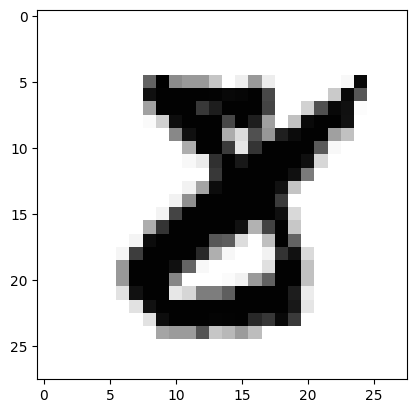

In [38]:
# 테스트 데이터를 사용하여 모델을 테스트함
with torch.no_grad():  ## torch.no_grad() 하면 gradiente 계산을 수행안함
    r = random.randint(0, len(test_data) - 1)
    X_single_data = test_data.test_data[r].view(-1, 28 * 28).float().to('cpu')
    Y_single_data = test_data.test_labels[r].to('cpu')

    print(f'Label: {Y_single_data.item()}')
    single_prediction = model(X_single_data)
    print(f'Prediction: {torch.argmax(single_prediction, 1).item()}')
    
    plt.imshow(test_data.test_data[r].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()